<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/04_polynomial_regression/4_regression_extra_oefeningen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

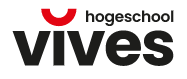<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# Lineaire regressie

## Opdracht 1

Laad de "Diabetes" dataset in met de functie `load_diabetes()` uit de `datasets` module van Scikit-Learn. Welke features zijn er?

Voer een lineaire regressie uit om het target van de dataset te voorspellen a.d.h.v. het BMI van een patiënt. Wat is de R², de correlatiecoëfficiënt en de MSE? Is er een sterk lineair verband?

Maak een scatterplot van de data en voeg de regressielijn toe.

## Opdracht 2

[Kaggle](https://www.kaggle.com/) is een online community voor mensen die bezig zijn met data science en machine learning. Je vindt er heel wat interessante datasets terug met bijhorende voorbeeldcode. Kaggle is ook bekend voor de competities die het organiseert.

In deze oefening gaan we een eenvoudige dataset downloaden van Kaggle met features van huizen: de oppervlakte, het aantal slaapkamers, de ouderdom van het huis en de prijs. Bedoeling is om een regressiemodel te trainen obv die dataset waarmee we dan de prijs van een nieuw huis kunnen voorspellen. Omdat we hier 3 onafhankelijke variabelen hebben (de features oppervlakte, aantal slaapkamers en de ouderdom) en 1 afhankelijke variabele (de target prijs) spreken we hier van **multivariate lineaire regressie**. Synoniemen zijn multivariabele of meervoudige lineaire regressie.

De dataset vind je hier:

https://www.kaggle.com/code/pankeshpatel/ml-for-beginners-2-multivariate-regression/data.

Lees de csv-file in en check of er ontbrekende waarden zijn. Je zal merken dat er één waarde ontbreekt bij het aantal slaapkamers. Vul die waarde op met de mediaan van die variabele. Uiteraard maak je hiervoor gebruik van code! Check bijvoorbeeld Pandas methode [`fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In een volgende stap gaan we na of we effectief lineaire regressie kunnen toepassen op de data. M.a.w. is er een lineair verband tussen de features en de target? We kunnen hiervoor gebruik maken van plot functies uit de [seaborn](https://seaborn.pydata.org/) library die gebaseerd is op matplotlib en speciaal is ontwikkeld voor het creëren van statistische plots.

Maak een [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) van de data en check of er inderdaad een lineair verband is tussen de prijs en de andere features. Naast een visuele check kunnen we natuurlijk ook de correlatiecoëfficiënt berekenen. Bij een multivariate analyse stellen we hiervoor een correlatiematrix op. Check hiervoor Pandas methode [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). Visualiseer de matrix met de [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) functie van `seaborn`.

Deze eerste fase van het verkennen van de data noemen we de **exploratory data analysis** (EDA). Als je de correlatiematrix correct hebt opgesteld, dan stel je vast dat er effectief een lineair verband is tussen features en targets. Dus je kan nu lineaire regressie toepassen mbv de `LinearRegression` klasse van `sklearn`. Dit is uiteraard de **trainingsfase**. Bereken de R² score en de Mean Absolute Error (MAE) om het bekomen model te evalueren.

Eens het model is getraind en geëvalueerd, komen we in de **inferentiefase** waarin we voorspellingen gaan maken met nieuwe data. Doe dit hier voor een huis dat 5 jaar oud is, 8 slaapkamers heeft en met een oppervlakte van 5000. Hoeveel schat je dat de kostprijs van dat huis is?

## Opdracht 3

We kunnen zelf datasets creëren voor lineaire regressie door gebruik te maken van de functie [`make_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) uit de `sklearn.datasets` module.

Als voorbeeld genereren we hier een dataset met 10 samples voor enkelvoudige lineaire regressie. Dat is dus een dataset die uit 1 feature `x` en 1 target `y` bestaat. We voegen een `bias` toe van -3, wat een ander woord is voor intercept, en `noise` met een standaardafwijking van 20.

Merk op dat we hier ook het aantal 'informatieve' features moeten opgeven. Dat zijn features die effectief correleren met de target. In dit geval hebben we dus 1 informatieve feature.

We fitten de dataset mbv de `LinearRegression` klasse van module `sklearn.linear_model`, berekenen de R²-score, en maken tenslotte een plot van de dataset mét de regressielijn mbv basic pyplot functies en mbv functie [`lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) van `seaborn`.

## Opdracht 4

We maken opnieuw gebruik van de functie `make_regression` om een dataset te genereren voor multivariate lineaire regressie. We nemen 1000 samples, 10 features waarvan 5 informatieve, 1 target, een bias van 15, en voegen noise toe met een standaarddeviatie van 50.

We stoppen de features en de target in een Pandas DataFrame. Op die manier kunnen we de belangrijkste statistieken opvragen mbv methode `describe`. We kunnen zo ook snel de correlatiematrix berekenen en zien dat er inderdaad maar 5 van de 10 features correleren met de target. Tenslotte fitten we de dataset mbv een lineair regressiemodel en we berekenen de R²-score, de MAE en de MSE om het model te evalueren.

# Polynomiale regressie

## Opdracht 5

We willen polynomiale regressie uittesten en daarvoor gaan we een fictieve dataset maken adhv een veeltermfunctie waarvan we de vergelijking kennen:

> $y = -x^2 + x + 15$

We schrijven zelf een functie om `y`-waarden te berekenen obv gegeven `x`-waarden. Op die manier zorgen we ervoor dat onze code herbruikbaar is! We maken gebruik van de volgende functiedefinitie

```
def polynomial(coefs, x):
```
We testen onze functie door waarden te genereren voor `x` tussen -5 en 5. We kunnen daarvoor gebruik maken van functie `np.linspace`

We plotten nu die punten op een grafiek en definiëren opnieuw een functie:
```
def draw_polynomial(coefs, x):
```

Nu gaan we rond die kwadratische curve een puntenwolk genereren. We genereren X-waarden in het interval $[-5,5]$. Voor de punten op de Y-as gebruiken we de veeltermfunctie en we voegen er **ruis** (Engels: noise) aan toe mbv de volgende formule:
```
polynomial(coefs, x) + random.gauss(mu=0, sigma=1.5)
```

Functie `random.gauss` genereert een random getal dat een normaalverdeling volgt met gemiddelde `mu` en standaardafwijking `sigma`.

We genereren 10 punten en slaan de coördinaten op in een lijst genaamd X en Y, respectievelijk.

We visualiseren de gegenereerde datapunten op een scatterplot.

## Opdracht 6

Op de puntenwolk die we gegenereerd hebben, proberen we nu verschillende modellen uit. Eerst stoppen we de punten in een dataframe, en sorteren we de gegenereerde datapunten volgens de X-as.

We visualiseren de datapunten in het dataframe nogmaals adhv een scatterplot om te controleren of de conversie naar een dataframe en de sortering gelukt zijn.

In de volgende code tonen we hoe we polynomiale regressie kunnen toepassen met behulp van SciKit-Learn. We proberen 4 modellen uit: een lineair model, en drie polynomiale modellen van graad 2, 5 en 10.
We plaatsen die plots naast elkaar en printen per plot ook de MSE.
Een dergelijke plot kan gebruikt worden als een visuele inspectie van verschillende modellen.
Om overfitting te evalueren wordt gebruik gemaakt van cross validation. We reserveren dus herhaaldelijk een stukje van de trainingset als validatieset.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
degrees = [1, 2, 5, 10]

# feature en label selecteren uit dataframe "data"
X_train = data['x'].to_numpy()
y_train = data['y'].to_numpy()

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):

    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Make pipeline for polynomial regression and fit data
    polynomial_features = PolynomialFeatures(
        degree=degrees[i],
        include_bias=False  # op False zetten want intercept/bias zit ook in LinearRegression!
    )
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train)  # X moet 2D matrix zijn!

    # Validate the models using crossvalidation
    scores = cross_val_score(pipeline, X_train[:, np.newaxis], y_train,
                             scoring="neg_mean_squared_error",  # neg_mean_squared error = -MSE
                             cv=10)  # cv is het aantal folds

    # Regression curve
    X_curve = np.linspace(-5, 5, 100)
    Y_curve = pipeline.predict(X_curve[:, np.newaxis])
    Y_true = polynomial(coefs, X_curve)  # oorspronkelijke model

    # Plot
    plt.plot(X_curve, Y_curve, label="Model")
    plt.plot(X_curve, Y_true, label="True function")
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((-5, 5))
    plt.ylim((-20, 20))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()));

# Regularization

## Opdracht 7

We gaan nu polynomiale regressie mét regularisatie toepassen op de dataset die we hebben gegenereerd. We gebruiken een veelterm van graad 10. Eerst voeren we de regressie uit zonder regularisatie zodat we goed het effect ervan kunnen zien.

We baseren ons op de code van hierboven, maar passen deze keer geen crossvalidatie toe. We plotten het resultaat op een figuur en zorgen ervoor dat de figuur zowel de originele veeltermfunctie, de datawolk, als de regressiecurve afbeeldt.

We doen nu net hetzelfde maar deze keer passen we **Ridge regressie** toe. We gebruiken hiervoor de volgende code:

> `polyreg=make_pipeline(PolynomialFeatures(degree, include_bias=False), Ridge(alpha=0.1, tol=0.1))`

Tenslotte passen we ook **Lasso regressie** toe. Hiervoor gebruiken we de volgende code:

> `polyreg=make_pipeline(PolynomialFeatures(degree, include_bias=False), Lasso(alpha=0.1, tol=0.1))`

# Training, validating, testing

## Opdracht 8

In deze opdracht illustreren we de volledige trainingfase met **simple hold-out validation**. We testen ook het geselecteerde model, en we doen een finale training op de volledige dataset om zo tot ons definitieve model te komen.

Lees de dataset "LinkedIn.csv" in als Pandas dataframe.

Splits je dataset als volgt op: neem telkens 500 willekeurige datapunten voor validatie- en testset; de overige datapunten vormen de trainingset. Tip: check scikit-learn functie `train_test_split`.

Pas enkelvoudige lineaire regressie en 2-de graads polynomiale regressie toe op de trainingset. Bereken telkens de MSE voor training- en validatieset. Voor welk model kies je?

Evalueer het gekozen model met de testset. Krijg je een even goed resultaat? Indien ja, train je definitieve model op de volledige set.

## Opdracht 9

In deze opdracht illustreren we de volledige trainingfase met **K-fold crossvalidatie**. We testen ook het geselecteerde model, en we doen een finale training op de volledige dataset om zo tot ons definitieve model te komen.

Lees de dataset "LinkedIn.csv" in als Pandas dataframe.

Splits je dataset als volgt op: neem 500 willekeurige datapunten voor de testset; de overige datapunten vormen de trainingset. Tip: check scikit-learn functie `train_test_split`.

Pas enkelvoudige lineaire regressie en 2-de graads polynomiale regressie toe op de trainingset. Pas K-fold crossvalidatie toe met 15 folds. Tip: check scikit-learn functie `cross_validate`. Bereken voor beiden de gemiddelde MSE voor training en validatie. Voor welk model kies je?

Hertrain het gekozen model op de volledige trainingset en evalueer met de testset. Krijg je een even goed resultaat? Indien ja, train je definitieve model op de volledige dataset.